[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mauro-moura/GA-023-Trabalho-Final/blob/main/01_data_analysis.ipynb)

In [2]:
import os

import glob
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt

In [3]:
def load_images(files, resize=(256,256)):
    images = []
    for file in files:
        im = Image.open(file)
        im = ImageOps.exif_transpose(im)
        if resize:
            im = im.resize(resize)
        im = im.convert('L')
        images.append(np.array(im))
    return np.array(images)

In [4]:
BASE_OUTPUT_PATH = 'outputs'

In [5]:
mode = ['images', 'masks']
BASE_PATH_IMGS = os.path.join('data', mode[0])
BASE_PATH_MASKS = os.path.join('data', mode[1])
files = glob.glob(os.path.join(BASE_PATH_IMGS, '*'))
files_masks = glob.glob(os.path.join(BASE_PATH_MASKS, '*'))

In [6]:
print(f"{len(files)} images")
print(f"{len(files_masks)} masks")

19 images
19 masks


In [7]:
images = load_images(files)
masks = load_images(files_masks)

In [8]:
print("Images shape: ", images.shape)
print("Masks shape: ", masks.shape)

Images shape:  (19, 256, 256)
Masks shape:  (19, 256, 256)


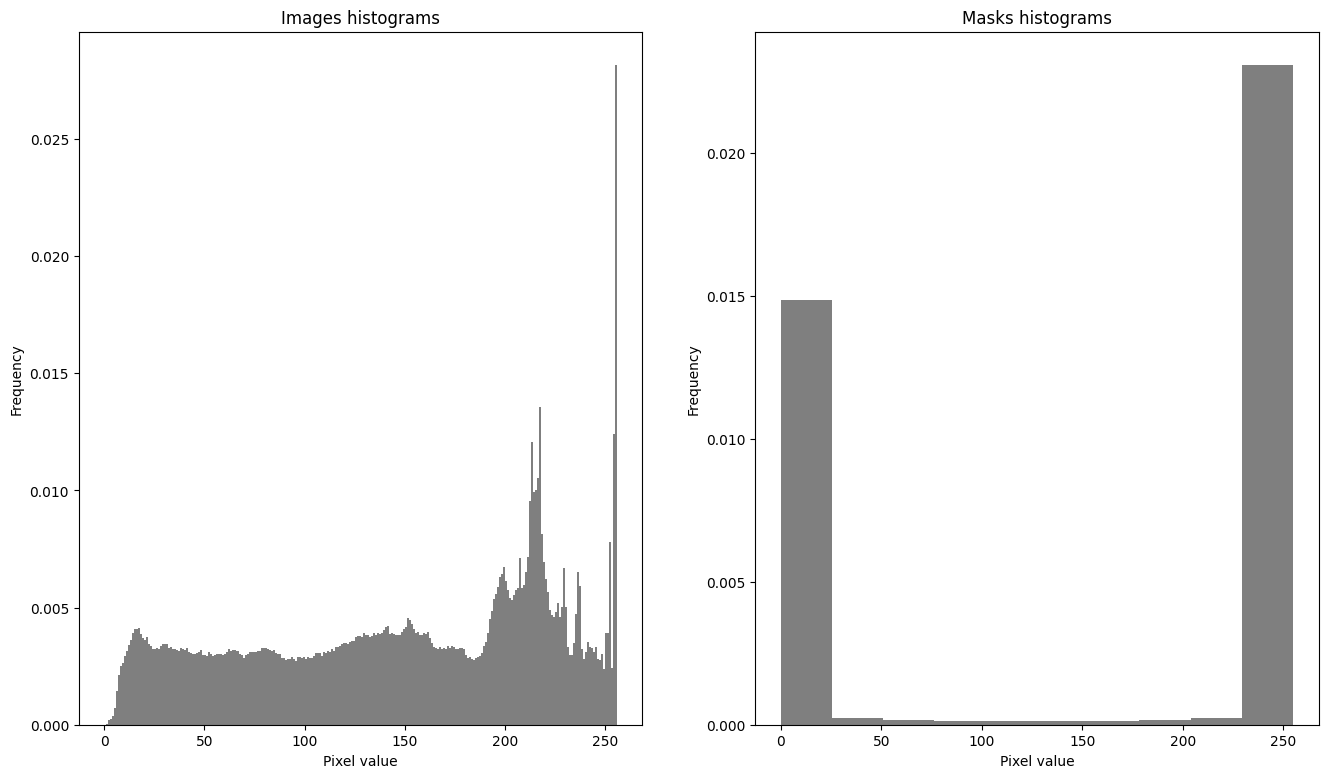

In [11]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
plt.hist(images.flatten(), bins=256, range=(0, 256), density=True, color='k', alpha=0.5)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Images histograms')

plt.subplot(1, 2, 2)
plt.hist(masks.flatten(), density=True, color='k', alpha=0.5)
plt.xlabel('Pixel value')
plt.ylabel('Frequency')
plt.title('Masks histograms')

plt.savefig(os.path.join(BASE_OUTPUT_PATH, 'data_histogram.png'))
plt.show()

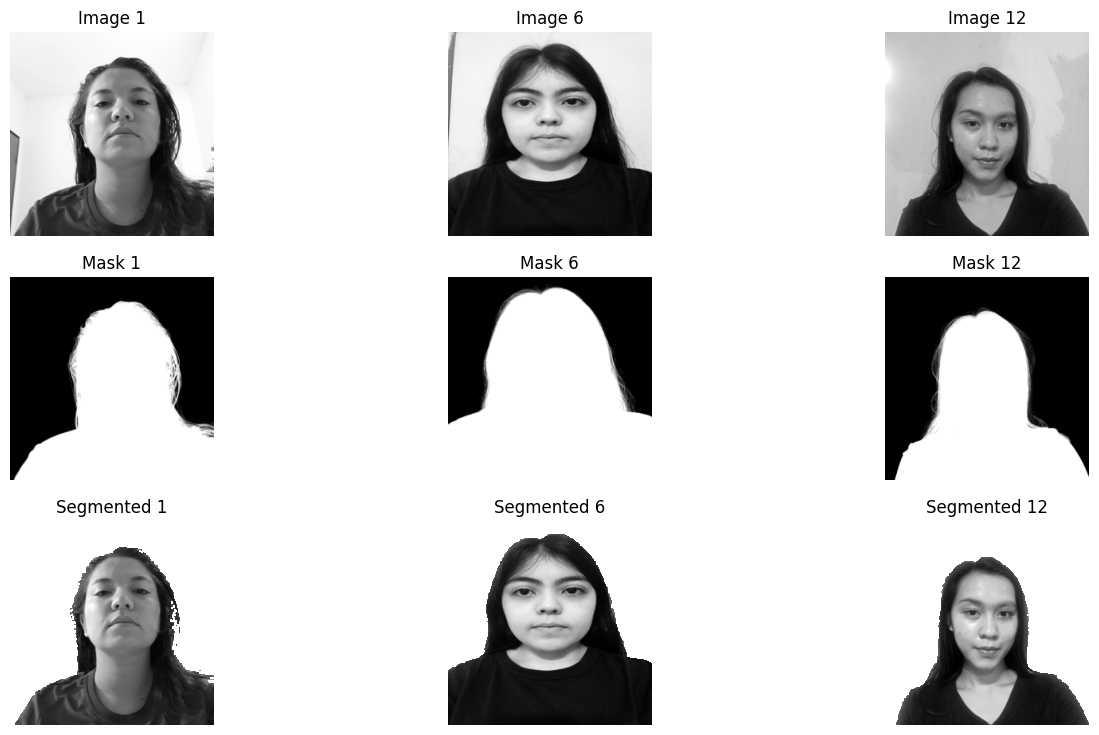

In [12]:
plt.figure(figsize=(16, 9))

idxs = [1, 6, 12]
for i, idx in enumerate(idxs):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Image {idx}')

    plt.subplot(3, 3, i+4)
    plt.imshow(masks[idx], cmap='gray')
    plt.axis('off')
    plt.title(f'Mask {idx}')

    # Segment image

    segmented = np.ma.masked_where(masks[idx]/255.0 < 0.5, images[idx])
    plt.subplot(3, 3, i+7)
    plt.imshow(segmented, cmap='gray')
    plt.axis('off')
    plt.title(f'Segmented {idx}')

plt.savefig(os.path.join(BASE_OUTPUT_PATH, 'data_samples.png'))
plt.show()